In [3]:
from helpers.io_helper import IO_Helper
from helpers import misc_helpers


RUN_SIZE = 'full'

X_train, y_train, X_val, y_val, X_test, y_test, X, y, scaler_y = misc_helpers._quick_load_data(RUN_SIZE)
y_test.shape

INFO:root:loading data
INFO:root:updating run size setup
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A va

(35040, 1)

In [4]:
from helpers.io_helper import IO_Helper
from collections import defaultdict


ARRAYS_FOLDER = 'arrays'
MODELS_FOLDER = 'models'

METHODS_WHITELIST = {
    'native_qhgbr',
    'native_qr',
    'native_gp',
    'native_mvnn',
    'posthoc_cp_hgbr',
    'posthoc_cp_linreg',
    'posthoc_cp_nn',
    'posthoc_la_nn',
}


METHOD_TO_ARR_NAMES_DICT = {
    'native_qhgbr': [
        'native_qhgbr_y_pred_n210432_it0.npy',
        'native_qhgbr_y_quantiles_n210432_it0.npy',
        'native_qhgbr_y_std_n210432_it0.npy',
    ],
    'native_qr': [
        'native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_quantiles_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_std_n210432_it300_nh2_hs50.npy',
    ],
    'native_gp': [
        'native_gpytorch_y_pred_n210432_it200_new.npy',
        'native_gpytorch_y_quantiles_n210432_it200_new.npy',
        'native_gpytorch_y_std_n210432_it200_new.npy',
    ],
    'native_mvnn': [
        'native_mvnn_y_pred_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_quantiles_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_std_n210432_it100_nh2_hs50.npy',
    ],
    'posthoc_cp_hgbr': [
        'posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_linreg': [
        'posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_nn': [
        'posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_quantiles_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_std_n210432_it5_cp2.npy',
    ],
    'posthoc_la_nn': [
        'posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_quantiles_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_std_n210432_it1000_la2.npy',
    ],
}
ARR_TYPES = ['pred', 'quantiles', 'std']  # order in lists above

TYPE_TO_METHOD_PAIRS = {
    'Baseline: QR vs. CP_LinReg': ['native_qr', 'posthoc_cp_linreg'],
    'Tree: QHGBR vs. CP_HGBR': ['native_qhgbr', 'posthoc_cp_hgbr'],
    'NN: MVNN vs. CP': ['native_mvnn', 'posthoc_cp_nn'],
    'NN: MVNN vs. LA': ['native_mvnn', 'posthoc_la_nn'],
    'GP': ['native_gp', None],
}

print('loading pred arrays')

io_helper = IO_Helper(arrays_folder=ARRAYS_FOLDER, models_folder=MODELS_FOLDER)

n_samples_test = y_test.shape[0]
pred_arrs = defaultdict(dict)
for uq_method in METHODS_WHITELIST:
    print(f'loading for {uq_method=}')
    pred_arrs_names = METHOD_TO_ARR_NAMES_DICT[uq_method]
    for arr_type, pred_arr_name in zip(ARR_TYPES, pred_arrs_names):
        try:
            pred_arr = io_helper.load_array(filename=pred_arr_name)
        except FileNotFoundError as e:
            print(f'error score array {e.filename} not found, skipping')
            continue
        pred_arrs[arr_type][uq_method] = pred_arr[-n_samples_test:].squeeze()
print('done')

INFO:root:loading array from comparison_storage\arrays\native_mvnn_y_pred_n210432_it100_nh2_hs50.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_y_quantiles_n210432_it100_nh2_hs50.npy


loading pred arrays
loading for uq_method='native_mvnn'


INFO:root:loading array from comparison_storage\arrays\native_mvnn_y_std_n210432_it100_nh2_hs50.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy


loading for uq_method='posthoc_cp_hgbr'


INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_y_pred_n210432_it200_new.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_y_quantiles_n210432_it200_new.npy


loading for uq_method='native_gp'


INFO:root:loading array from comparison_storage\arrays\native_gpytorch_y_std_n210432_it200_new.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_y_quantiles_n210432_it1000_la2.npy


loading for uq_method='posthoc_la_nn'


INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_y_std_n210432_it1000_la2.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_y_quantiles_n210432_it300_nh2_hs50.npy


loading for uq_method='native_qr'


INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_y_std_n210432_it300_nh2_hs50.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_y_quantiles_n210432_it5.npy


loading for uq_method='posthoc_cp_linreg'


INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_y_std_n210432_it5.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_y_quantiles_n210432_it5_cp2.npy


loading for uq_method='posthoc_cp_nn'


INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_y_std_n210432_it5_cp2.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_y_pred_n210432_it0.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_y_quantiles_n210432_it0.npy


loading for uq_method='native_qhgbr'


INFO:root:loading array from comparison_storage\arrays\native_qhgbr_y_std_n210432_it0.npy


done


In [5]:
pred_arrs_pairwise = {
    arr_type: {
        method_type: (pred_arrs_dict[method_nat],
                      pred_arrs_dict[method_post] if method_post is not None else None)
        for method_type, (method_nat, method_post) in TYPE_TO_METHOD_PAIRS.items()
    }
    for arr_type, pred_arrs_dict in pred_arrs.items()
}
pred_arrs_pairwise

{'pred': {'Baseline: QR vs. CP_LinReg': (array([ 9783.58  ,  9781.988 ,  9695.317 , ..., 10517.1875, 10363.825 ,
          10129.327 ], dtype=float32),
   array([ 9647.95 ,  9652.949,  9548.094, ..., 10388.907, 10292.132,
          10093.748], dtype=float32)),
  'Tree: QHGBR vs. CP_HGBR': (array([ 9709.94784506,  9707.31604207,  9611.18431512, ...,
          10465.39518253, 10417.45193781, 10105.10182902]),
   array([ 9737.56648373,  9745.78686025,  9618.2824374 , ...,
          10440.47079603, 10337.36995315, 10083.84929513])),
  'NN: MVNN vs. CP': (array([ 9897.499,  9934.347,  9875.633, ..., 10652.775, 10494.646,
          10276.348], dtype=float32),
   array([ 9709.305,  9704.084,  9615.071, ..., 10511.26 , 10349.859,
          10107.834], dtype=float32)),
  'NN: MVNN vs. LA': (array([ 9897.499,  9934.347,  9875.633, ..., 10652.775, 10494.646,
          10276.348], dtype=float32),
   array([ 9709.305,  9704.084,  9615.071, ..., 10511.26 , 10349.859,
          10107.834], dtype=floa

plotting
plotting
plotting
plotting


INFO:root:saving plot to comparison_storage\plots\kde_plot_native_stds.png


saving plot
showing plot


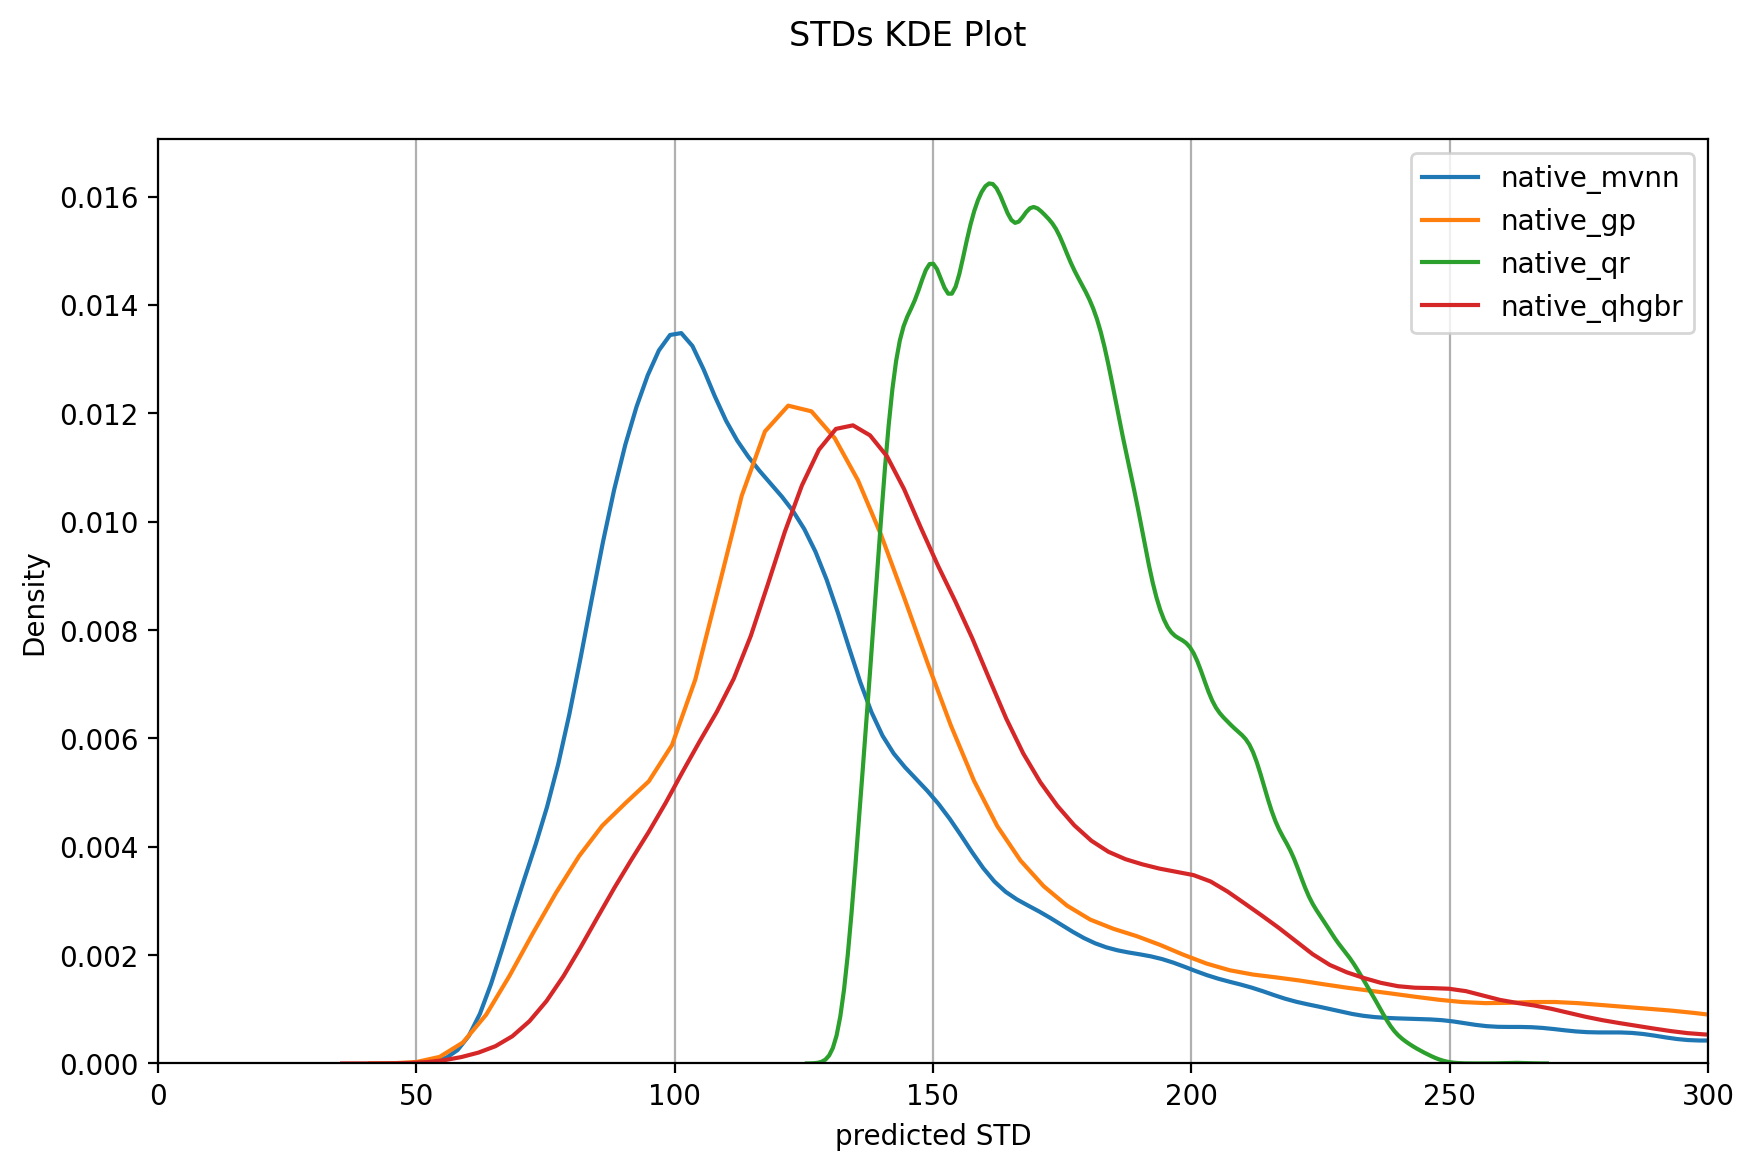

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

FILENAME_STD = f'kde_plot_native_stds.png'
DPI = 200
BINS = 250

std_arrs_native = {method: std_arr for method, std_arr in std_arrs.items() if method.startswith('native_')}

# counts, bins = np.histogram(np.ravel(list(std_arrs_native.values())), bins=BINS)
fig, ax = plt.subplots(figsize=(10, 6), dpi=DPI)
fig.suptitle('STDs KDE Plot')
ax.set_xlim(0, 300)
ax.set_xlabel('predicted STD')
for method, std_arr in std_arrs_native.items():
    print('plotting')
    # sns.histplot(std_arr, bins=bins, fill=False, element='step', label=method, common_bins=True, ax=ax, alpha=0.1, kde=True)
    sns.kdeplot(std_arr, ax=ax, label=method, bw_adjust=0.7)
ax.legend()
ax.grid(axis='x', zorder=-1)

if FILENAME_STD is not None:
    print('saving plot')
    io_helper.save_plot(filename=FILENAME_STD)
print('showing plot')
plt.show()

In [15]:
import numpy as np

for method, std_arr in std_arrs.items():
    min, max, mean, std = map(lambda func: func(std_arr), [np.min, np.max, np.mean, np.std])
    min, max, mean = map(lambda val: round(val, 1), [min, max, mean])
    std = round(std, 3)
    print(f'\n{method=}\n{min=}\n{max=}\n{mean=}\n{std=}')


method='native_mvnn'
min=59.8
max=461.0
mean=134.4
std=57.285

method='posthoc_cp_hgbr'
min=146.3
max=146.3
mean=146.3
std=0.0

method='native_gp'
min=60.5
max=916.5
mean=158.3
std=75.106

method='posthoc_la_nn'
min=191.9
max=192.2
mean=192.0
std=0.014

method='native_qr'
min=131.7
max=262.7
mean=173.9
std=23.65

method='posthoc_cp_linreg'
min=296.2
max=296.2
mean=296.2
std=0.0

method='posthoc_cp_nn'
min=178.4
max=178.4
mean=178.4
std=0.0

method='native_qhgbr'
min=49.7
max=677.5
mean=157.9
std=54.333
